# Voter separation


In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
from importlib import reload
import sys
from IPython.display import *
sys.path.append("..")
from src import vote_utils as vu
from src import plot_utils as pu
from src import dissimilarity_analysis as da

%matplotlib inline

  0%|          | 0/1216 [00:00<?, ?it/s]

dict_keys(['df_data_boxes', 'df_data', 'fig_latest_point'])

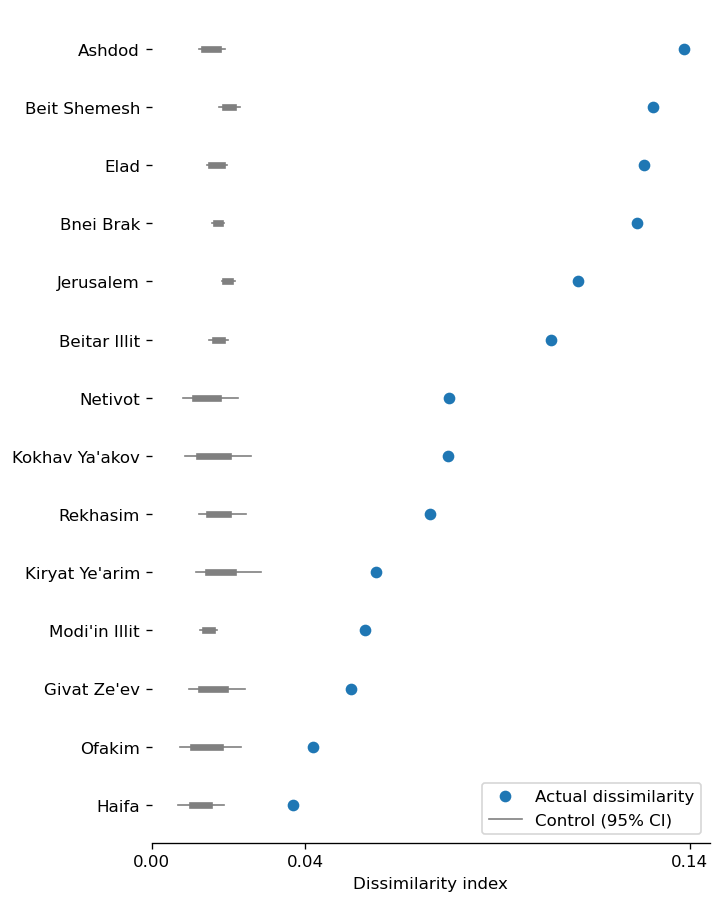

In [4]:
dct = da.main(knesset_numbers=25)
df_data = dct["df_data"]
dct.keys()

In [5]:
df_data.head()

,knesset_number,city_code,city_name,n_boxes,n_voters,n_legal,n_relevant_boxes,n_relevant_voters,n_relevant_legal,city_ref_ratio,city_ratios,dissimilarity,dissimilarity_simulation,simulation_fraction,y_city,y,n_haredi_population,fraction_haredim,fraction_haredim_of_jewish_population,fraction_of_total_haredim_in_israel
0,25,70,Ashdod,302,181784,116294,30,18030,15277,0.373512,"[4.488636363636363, 0.4025974025974026, 0.7676...",0.138561,"[0.015640961955887846, 0.0157735269447845, 0.0...",0.0,13,13,48626,0.214,0.241661,0.040902
1,25,2610,Beit Shemesh,133,78064,51275,63,37283,23530,0.436247,"[1.1104294478527608, 0.6784140969162996, 0.848...",0.130353,"[0.02158538060388978, 0.019730754094739962, 0....",0.0,12,12,115398,0.746,0.755351,0.097067
2,25,1309,Elad,39,23395,19637,36,21709,18231,1.383255,"[3.8472222222222223, 3.7157894736842105, 1.848...",0.128052,"[0.018799053494323037, 0.017566930979774978, 0...",0.0,11,11,46058,0.931,0.930954,0.038742
3,25,6100,Bnei Brak,187,115586,87692,170,105609,80933,0.471433,"[1.9333333333333333, 1.5033557046979866, 1.215...",0.126192,"[0.019046344334968775, 0.017620329921807783, 0...",0.0,10,10,202959,0.929,0.935351,0.170718
4,25,3000,Jerusalem,706,432125,264700,202,123662,79019,0.490935,"[0.41132075471698115, 0.7129186602870813, 0.90...",0.110863,"[0.018889251494145207, 0.018431218471124076, 0...",0.0,9,9,290090,0.295,0.499097,0.244008


In [6]:
df_data_boxes = dct["df_data_boxes"]
df_data_boxes.head()

,city_name,city_code,ballot_code,can_vote,voted,void,legal,party_avoda,party_bayit_yehudi,party_agudat_israel,party_kahol_lavan,party_israel_beitenu,party_likud,party_meretz,party_raam,party_yesh_atid,party_shas,knesset_number
0,אבו גווייעד שבט,967,3.1,570,173,4,169,0,0,0,1,0,9,0,132,0,0,25
1,אבו גווייעד שבט,967,3.2,570,96,1,95,1,0,0,0,0,1,0,90,0,0,25
2,אבו גווייעד שבט,967,3.3,570,169,1,168,0,0,0,3,0,0,0,150,1,2,25
3,אבו גווייעד שבט,967,3.4,569,111,3,108,0,0,0,1,0,2,0,96,0,2,25
4,אבו גוש,472,1.1,598,360,7,353,1,0,0,0,0,11,10,110,5,0,25


In [8]:
import matplotlib.pyplot as plt
def heb(s):
    return get_display(s)

In [77]:
import matplotlib.pyplot as plt

COLOR_SHAS = "#1B3161"
COLOR_AGUDA = "#FFD700"
COLOR_REST = "lightgrey"


def plot_city(
    df, city, ax=None, startangle=90, add_labels=True, add_percent=True, str_title=None
):
    df_city = df.loc[df.city_name == city][
        ["party_shas", "party_agudat_israel", "legal"]
    ]
    rest = df_city.legal - df_city.party_shas - df_city.party_agudat_israel
    aguda = df_city.party_agudat_israel.sum()
    shas = df_city.party_shas.sum()
    rest = rest.sum()

    # Data for the pie chart
    sizes = [rest, shas, aguda]
    labels = ["אחרים", "שס", "אגודה"]
    colors = [COLOR_REST, COLOR_SHAS, COLOR_AGUDA]

    if ax is None:
        _, ax = plt.subplots(figsize=(3,3), dpi=300)

    if add_labels:
        labels_formatted = [
            heb(label) for label in labels
        ]
    else:
        labels_formatted = [""] * len(labels)

    autopct = "%1.0f%%" if add_percent else None

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels_formatted,
        colors=colors,
        autopct=autopct,
        startangle=startangle,
    )

    # Change text color for the "Shas" segment (index 1)
    for i, autotext in enumerate(autotexts):
        if i == 1:  # "Shas" is always index 1 in sizes
            autotext.set_color("white")
        else:
            autotext.set_color("black")

    if str_title is not None:
        ax.set_title(heb(str_title))
    ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    return ax

<Axes: >

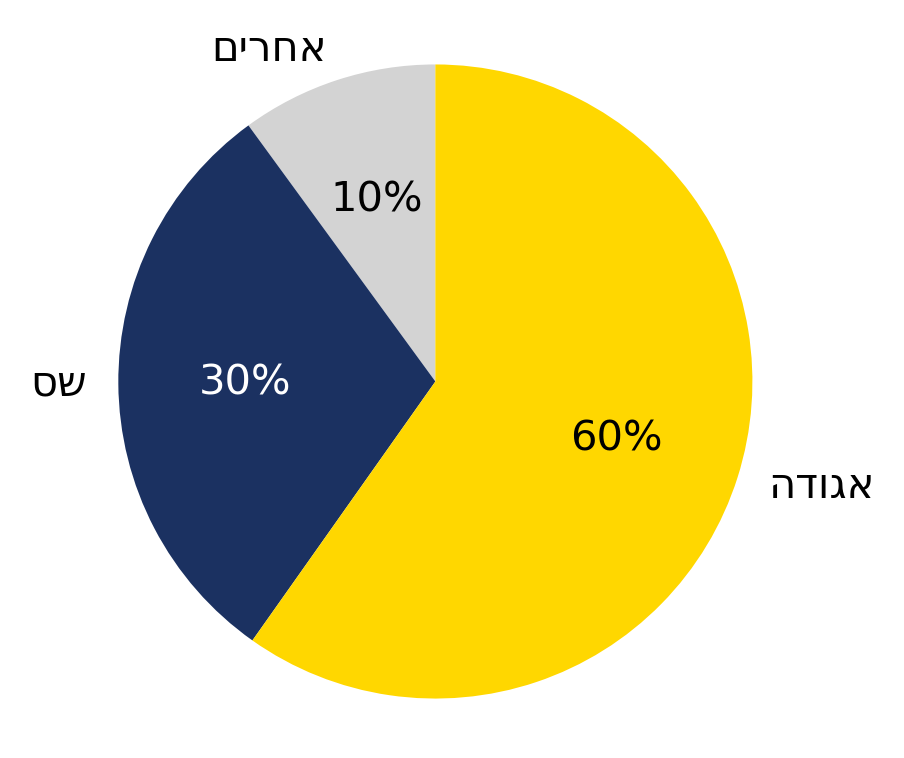

In [78]:
bnei_brak = "בני ברק"
plot_city(df_data_boxes, bnei_brak)

<Axes: >

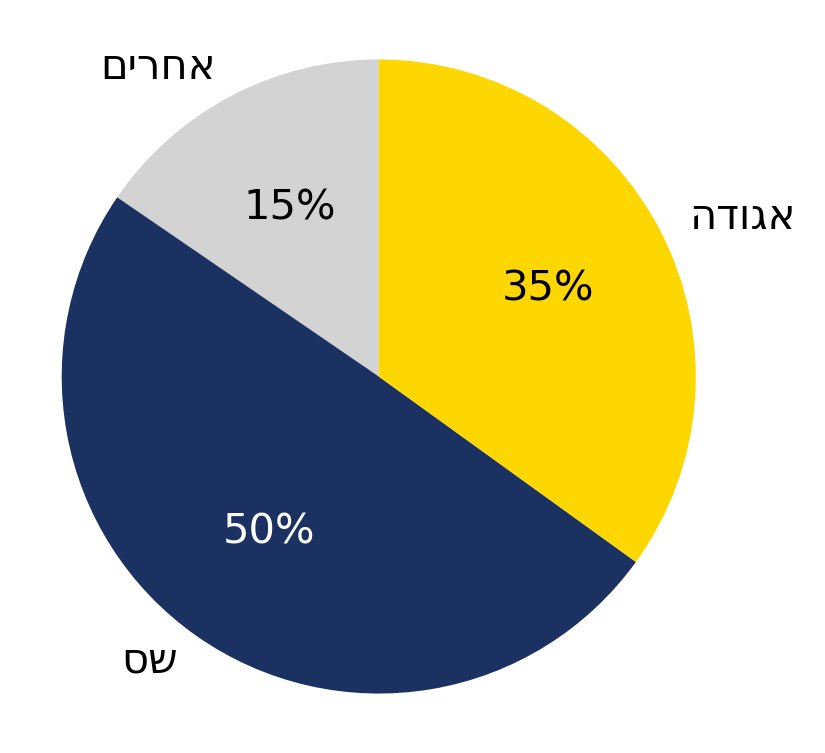

In [79]:
plot_city(df_data_boxes, "אלעד")

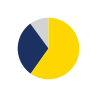

In [90]:
fig, ax = plt.subplots(figsize=(1,1), dpi=100)
try:
    plot_city(df_data_boxes, "בני ברק", ax=ax, add_labels=False, add_percent=False)
except:
    pass


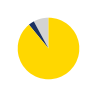

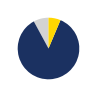

In [91]:
df_dummy = df_haredi_boxes.loc[df_haredi_boxes.city_name == "בני ברק"].copy()
to_move = (df_dummy.party_shas * 0.9).astype(int)
df_dummy.party_agudat_israel += to_move
df_dummy.party_shas -= to_move
fig, ax = plt.subplots(figsize=(1,1), dpi=100)
try:
    plot_city(df_dummy, "בני ברק", ax=ax, add_labels=False, add_percent=False)
except:
    pass
df_dummy = df_haredi_boxes.loc[df_haredi_boxes.city_name == "בני ברק"].copy()
to_move = (df_dummy.party_agudat_israel * 0.9).astype(int)
df_dummy.party_shas += to_move
df_dummy.party_agudat_israel -= to_move
fig, ax = plt.subplots(figsize=(1, 1), dpi=100)
try:
    plot_city(df_dummy, "בני ברק", ax=ax, add_labels=False, add_percent=False)
except:
    pass

In [85]:
df_dummy

,city_name,city_code,ballot_code,can_vote,voted,void,legal,party_avoda,party_bayit_yehudi,party_agudat_israel,party_kahol_lavan,party_israel_beitenu,party_likud,party_meretz,party_raam,party_yesh_atid,party_shas,knesset_number
1853,בני ברק,6100,2.1,640,454,0,454,0,0,120,4,6,52,1,0,5,232,25
1855,בני ברק,6100,2.3,640,484,0,484,4,0,149,4,5,51,3,0,8,224,25
1856,בני ברק,6100,2.4,640,505,6,499,2,1,172,4,1,65,0,0,9,209,25
1857,בני ברק,6100,2.5,640,469,1,468,2,0,122,7,6,42,1,0,13,242,25
1858,בני ברק,6100,2.6,636,479,5,474,1,0,219,5,5,42,0,0,11,153,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,בני ברק,6100,146.2,436,352,7,345,0,0,261,1,0,7,0,0,0,66,25
2033,בני ברק,6100,160.0,598,479,7,472,0,0,328,2,0,8,0,0,1,120,25
2034,בני ברק,6100,166.0,646,515,4,511,0,1,360,2,0,15,0,0,0,117,25
2035,בני ברק,6100,171.0,605,485,8,477,0,0,356,2,0,6,0,0,0,88,25


In [17]:
sel_homogenic = vu.is_homogenic(df_data_boxes)
sel_at_least_10_aguda = df_data_boxes.party_agudat_israel > 10
sel_not_too_many_shas = (df_data_boxes.party_shas + 1) / (
    df_data_boxes.party_agudat_israel + 1
) < 8
df_sels = pd.DataFrame(
    {
        "homogenic": sel_homogenic,
        "at_least_10_aguda": sel_at_least_10_aguda,
        "not_too_many_shas": sel_not_too_many_shas,
    }
)
df_sels.head()

,homogenic,at_least_10_aguda,not_too_many_shas
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [18]:
sel_haredi = sel_homogenic & sel_at_least_10_aguda & sel_not_too_many_shas
df_haredi_boxes = df_data_boxes.loc[sel_haredi]
df_haredi_boxes

,city_name,city_code,ballot_code,can_vote,voted,void,legal,party_avoda,party_bayit_yehudi,party_agudat_israel,party_kahol_lavan,party_israel_beitenu,party_likud,party_meretz,party_raam,party_yesh_atid,party_shas,knesset_number
189,אופקים,31,11.0,657,533,3,530,0,1,285,0,2,43,1,0,1,169,25
190,אופקים,31,12.0,698,559,5,554,0,0,220,2,6,42,0,1,1,262,25
193,אופקים,31,15.2,641,500,4,496,2,2,222,4,11,51,0,0,6,169,25
200,אופקים,31,20.0,663,577,4,573,0,0,275,3,1,48,0,0,5,205,25
211,אופקים,31,33.0,515,422,7,415,0,0,214,0,4,25,0,0,4,154,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10935,רכסים,922,9.0,552,471,1,470,1,0,204,0,2,21,0,0,2,222,25
10936,רכסים,922,10.0,550,465,1,464,1,0,195,5,0,21,2,0,5,200,25
11762,תל אביב יפו,5000,21.0,655,592,1,591,2,0,479,6,2,9,2,1,11,64,25
12535,תפרח,709,1.0,549,480,3,477,0,0,337,2,0,23,3,0,1,89,25


In [19]:
df_haredi_boxes[df_haredi_boxes.city_name == 'חיפה'].party_shas.sum()

144

In [38]:
df_ratio = df_haredi_boxes[['city_name', 'party_shas', 'party_agudat_israel']].copy()
df_ratio['rest'] = df_haredi_boxes.legal - df_haredi_boxes.party_shas - df_haredi_boxes.party_agudat_israel
df_ratio = df_ratio.groupby('city_name').agg(sum)
df_ratio["perc_haredi"] = (
    100
    * (df_ratio.party_agudat_israel + df_ratio.party_shas)
    / (df_ratio.party_agudat_israel + df_ratio.party_shas + df_ratio.rest)
)
df_ratio['aguda_over_shas'] = df_ratio.party_agudat_israel / df_ratio.party_shas 
df_ratio = df_ratio.sort_values('aguda_over_shas', ascending=False)
df_ratio = df_ratio.loc[
    ((df_ratio.party_agudat_israel + df_ratio.party_shas) > 1000) &
    (df_ratio.perc_haredi > 5)
]
df_ratio['total_haredi'] = df_ratio.party_agudat_israel + df_ratio.party_shas
df_ratio = df_ratio.sort_values('total_haredi', ascending=True).tail(10).copy()
# df_ratio = df_ratio.loc[df_ratio.total_haredi > 2500].copy()
print(f'{len(df_ratio)} cities')
df_ratio

10 cities


/var/folders/xy/6n3m38qx423b_gjbx89x02b40000gn/T/ipykernel_2989/3854358077.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_ratio = df_ratio.groupby('city_name').agg(sum)


,party_shas,party_agudat_israel,rest,perc_haredi,aguda_over_shas,total_haredi
city_name,,,,,,
קרית יערים,619,1746,338,87.495376,2.820679,2365
נתיבות,2027,821,373,88.419745,0.405032,2848
רכסים,2770,2412,655,88.778482,0.870758,5182
אשדוד,3892,10420,965,93.683315,2.677287,14312
אלעד,8726,6530,2521,85.818755,0.748338,15256
ביתר עילית,7303,14081,2304,90.273556,1.928112,21384
בית שמש,6504,14909,2117,91.002975,2.292282,21413
מודיעין עילית,5277,20662,716,97.313825,3.915482,25939
ירושלים,23097,47047,8875,88.768524,2.036931,70144


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal

COLOR_SHAS = "#1B3161"
COLOR_AGUDA = "#FFD700"
COLOR_REST = "grey"


def plot_haredi_data(df_ratio, what: Literal["total", "split", "difference"]):
    y = np.arange(df_ratio.shape[0])
    w = 5.5
    h = w * 9 / 16
    fig, ax = plt.subplots(figsize=(w, h), dpi=300)

    if what == "total":
        ax.barh(y=y, width=df_ratio.total_haredi, color="darkgrey")

    elif what == "split":
        ax.barh(
            y=y,
            width=df_ratio.party_agudat_israel,
            color=COLOR_AGUDA,
        )
        ax.barh(
            y=y,
            width=df_ratio.party_shas,
            left=df_ratio.party_agudat_israel,
            color=COLOR_SHAS,
        )

    elif what == "difference":
        ax.barh(
            y=y,
            width=df_ratio.party_agudat_israel,
            color=COLOR_AGUDA,
        )
        ax.barh(
            y=y,
            width=-df_ratio.party_shas,
            color=COLOR_SHAS,
        )
        for yy, (city, row) in enumerate(df_ratio.iterrows()):
            if row.party_agudat_israel > row.party_shas:
                ax.barh(yy, row.party_shas, color=COLOR_SHAS, alpha=0.5)
            else:
                ax.barh(yy, -row.party_agudat_israel, color=COLOR_AGUDA, alpha=0.5)

    ax.set_yticks(y)
    ax.set_yticklabels([heb(city) for city in df_ratio.index])
    sns.despine(ax=ax, left=True)
    if what == "difference":
        xticks = [-df_ratio.party_shas.max(), 0, df_ratio.party_agudat_israel.max()]
        ax.axvline(0, color='black', linewidth=1.0)
    else:
        mid_point = df_ratio.total_haredi.max() // 2
        # find the closest to mid_point tick
        diffs = np.abs(df_ratio.total_haredi - mid_point)
        ix = np.argmin(diffs)
        mid_city_data = df_ratio.iloc[ix].total_haredi
        xticks = [0, mid_city_data, df_ratio.total_haredi.max()]
    xticks = np.round(xticks, -2).astype(int)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{abs(x):,}" for x in xticks])
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='y', size=0)

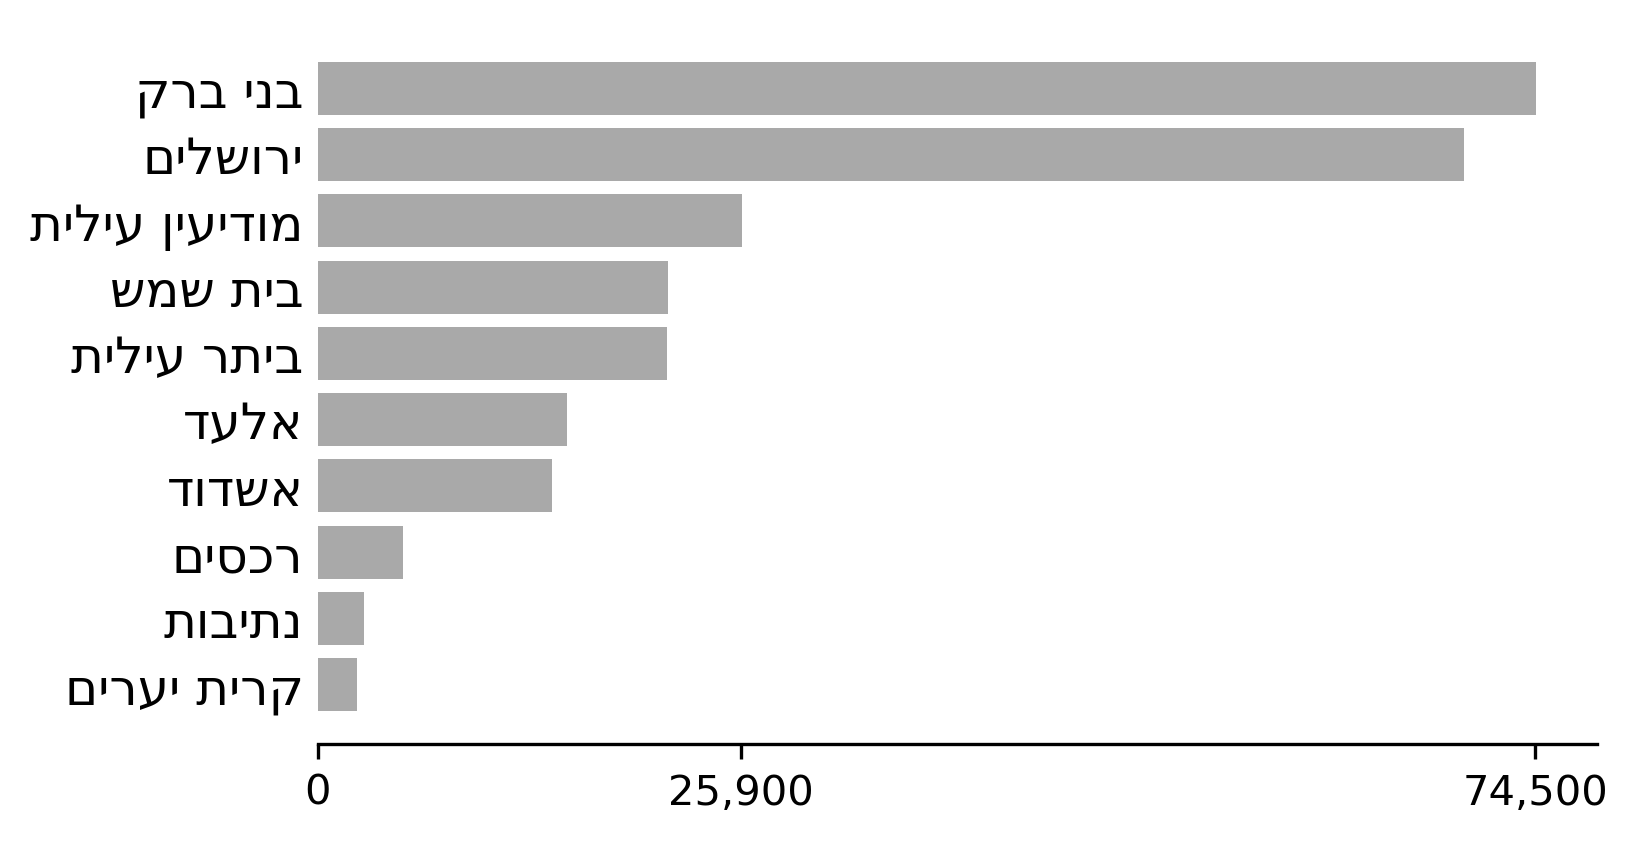

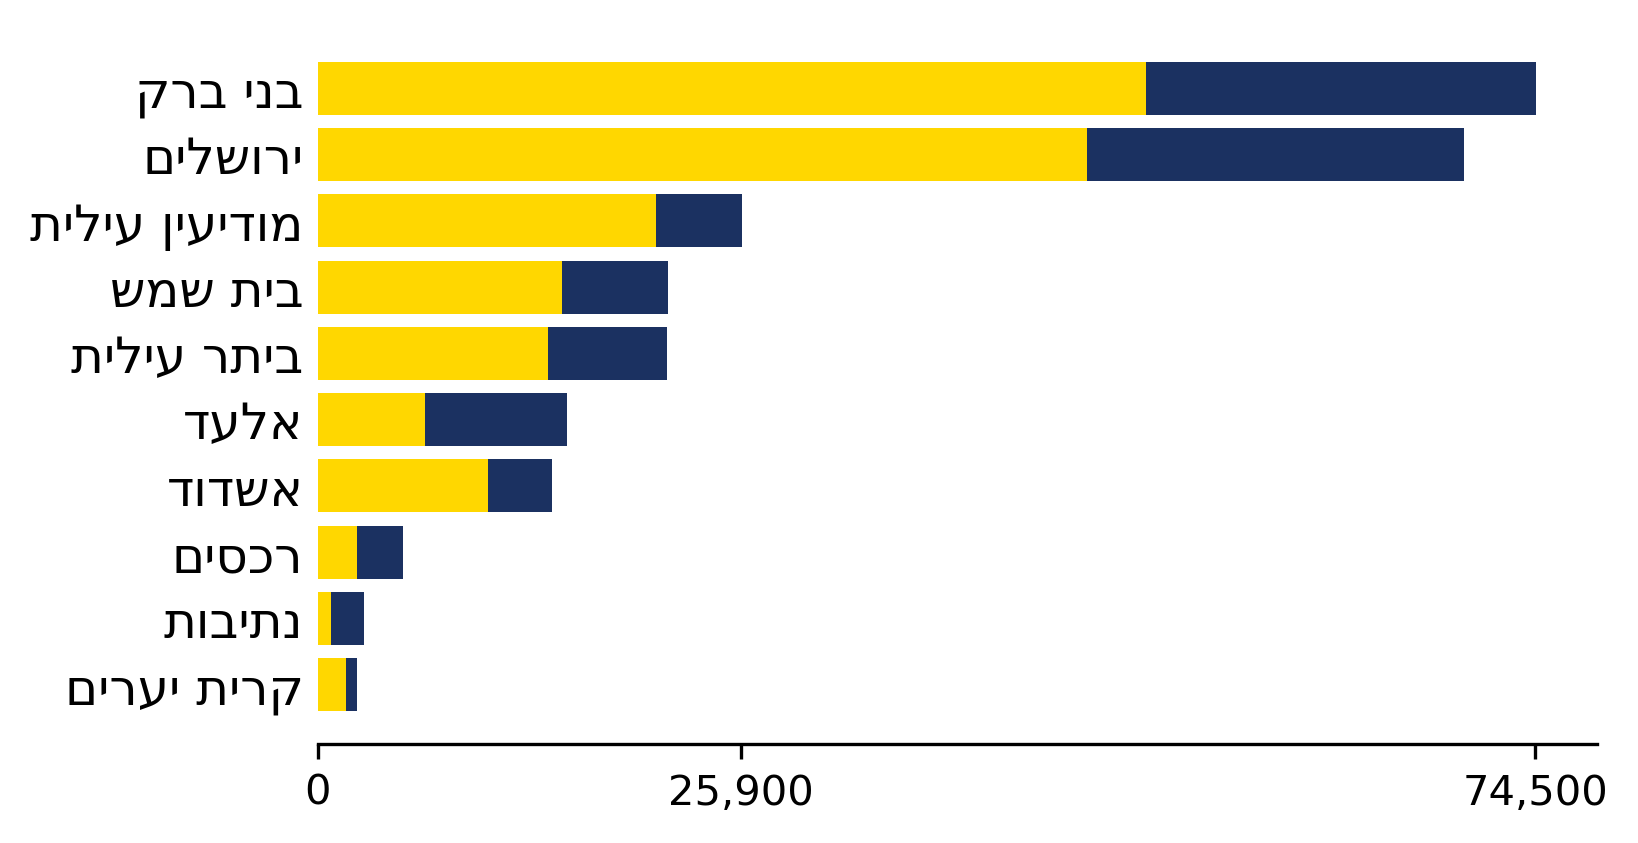

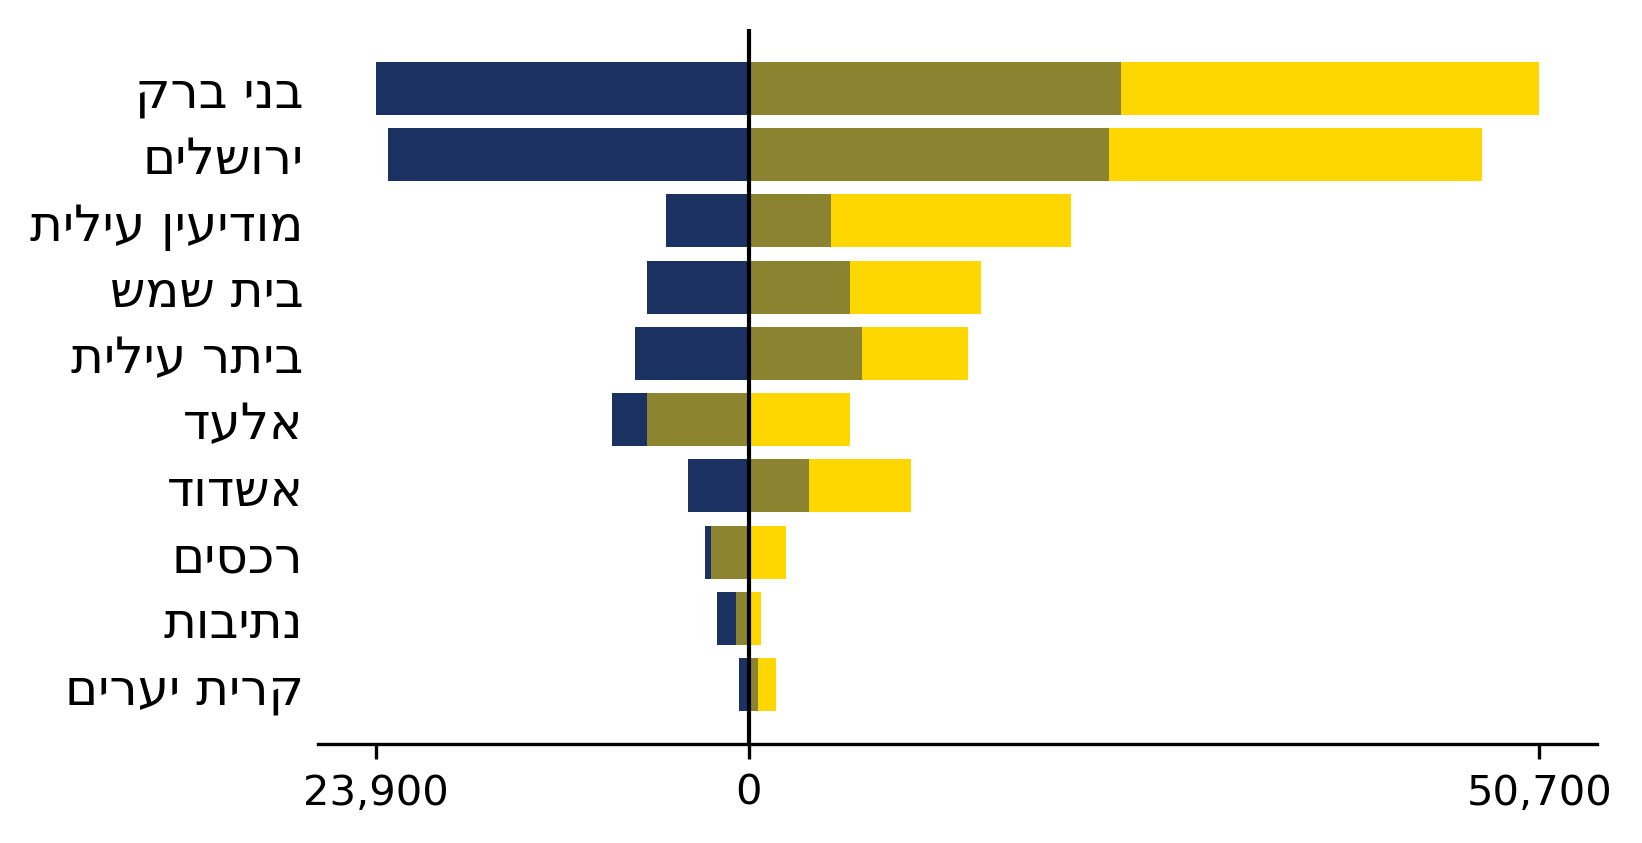

In [70]:
for what in ["total", "split", "difference"]:
    plot_haredi_data(df_ratio, what)

In [ ]:
for city in df_ratio.sort_values('perc_haredi').index:
    plot_city(df_haredi_boxes, city)

In [ ]:
df_haredi_boxes.knesset_number.value_counts()

In [ ]:
df_turnout = df_haredi_boxes[["city_name", "city_code", "can_vote", "legal"]].copy()
df_turnout["turnout"] = df_turnout.legal / df_turnout.can_vote * 100

bins = [0, 25, 50, 75, 100]
labels = ["0-25%", "25-50%", "50-75%", "75-100%"]
df_turnout["turnout_cat"] = pd.cut(df_turnout.turnout, bins=bins, labels=labels)
df_turnout.dtypes

In [ ]:
df_city_sizes = (
    df_turnout.groupby("city_name")["can_vote"].sum().sort_values(ascending=False)
)
df_city_sizes

In [172]:
from bidi.algorithm import get_display

In [173]:
def make_agg(df):
    ret = {
        "can_vote": df.can_vote.sum(),
        "boxes": df.shape[0],
    }
    return pd.Series(ret)

def summarize_turnout(df):
    df_groups_counts = (
        df.groupby("turnout_cat", observed=True)
        .apply(make_agg, include_groups=False)
        .rename(
            columns={
                "can_vote": "מתוך בעלי זכות בחירה",
                "boxes": "מתוך קלפיות",
            }
        )
    ).rename_axis("אחוז הצבעה")
    # ensure we have all the categories from turnout_cat, if not, add them with 0
    df_groups_counts = df_groups_counts.reindex(labels, fill_value=0)
    
    df_groups_perc = (df_groups_counts / df_groups_counts.sum() * 100).round(2).loc[labels]
    return df_groups_perc


In [ ]:
display(Markdown("## סיכום הצבעה"))
display(summarize_turnout(df_turnout))
turnout_summaries = {'overall': summarize_turnout(df_turnout)}
for city_name in df_city_sizes.head(5).index:
    sel_city = df_turnout.city_name == city_name
    turnout_summaries[city_name] = summarize_turnout(df_turnout.loc[sel_city])
    display(Markdown(f"## {city_name}"))
    display(turnout_summaries[city_name])

In [175]:
n_cities = 5
df_turnout_summary = []
for k, v in turnout_summaries.items():
    v['city_name'] = k
    df_turnout_summary.append(v)
df_turnout_summary = pd.concat(df_turnout_summary)


In [176]:
def plot_turnout_cities(
    df_turnout_summary,
    turnout_column='מתוך קלפיות',
    xlabel_text='מתוך קלפיות',
    axis_title='',
    turnout_label='0-25%',
    overall_city_name='overall'
):
    """
    Plot a horizontal bar chart for cities with low voter turnout.

    Args:
        df_turnout_summary (pd.DataFrame): DataFrame containing turnout summary data.
        turnout_column (str): The column to plot, e.g., 'מתוך קלפיות'.
        xlabel_text (str): The x-axis label text.
        axis_title (str): The title of the plot.
        low_turnout_label (str, optional): Label for low-turnout cities in the DataFrame index. Default is '0-25%'.
        overall_city_name (str, optional): Name of the overall city row in the DataFrame. Default is 'overall'.
    """
    # Filter and sort DataFrame for low-turnout cities
    df_curr = df_turnout_summary.loc[turnout_label].sort_values(turnout_column, ascending=True)
    
    # Split into overall and rest
    sel_overall = df_curr.city_name == overall_city_name
    df_overall = df_curr.loc[sel_overall]
    df_rest = df_curr.loc[~sel_overall]
    
    # Plot setup
    fig, ax = plt.subplots()
    y = np.arange(df_rest.shape[0])  # Bar positions
    x = df_rest[turnout_column]     # Bar widths
    
    # Bar plot
    ax.barh(y=y, width=x)
    
    # Add labels
    labels = []
    for yy, xx in zip(y, x):
        curr_city = df_rest.iloc[yy].city_name
        labels.append(get_display(curr_city))
        ax.text(xx, yy, f'{xx:.1f}', va='center', ha='left')
    
    ax.set_yticks(y)
    ax.set_yticklabels(labels)
    
    # Add overall line
    overall_value = df_overall[turnout_column].values[0]
    ax.axvline(overall_value, color='red', linestyle='--')
    ax.text(overall_value, 0, get_display('הממוצע'), va='top', ha='right')
    
    # Add x-axis ticks and label
    ax.set_xticks([0, overall_value, max(x)])
    ax.set_xlabel(get_display(xlabel_text))
    
    # Set title and grid
    sns.despine()
    ax.grid(axis='x')
    ax.set_title(get_display(axis_title))
    return ax
    

In [ ]:
ax = plot_turnout_cities(df_turnout_summary, axis_title='רק בשתי ערים יש קלפיות ״מוחרמות״')

In [ ]:
plot_turnout_cities(df_turnout_summary, turnout_label='75-100%', axis_title='קלפיות ״מגוייסות״ - תופעה נפוצה')